<a href="https://colab.research.google.com/github/tehilla19/BabiBot/blob/tehilla19-patch-1/LukemyaProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive//MyDrive/

/content/drive/MyDrive


In [ ]:
!mkdir GitEx

mkdir: cannot create directory ‘GitEx’: File exists


In [ ]:
!git init

Reinitialized existing Git repository in /content/drive/MyDrive/.git/


In [ ]:
!git config --global init.defaultBranch main

In [ ]:
!git remote add tehilla19 https://github.com/tehilla19/Lokemia2024.git


error: remote tehilla19 already exists.


In [ ]:
!git add .


error: open("homework7 Tehilla Moshkovitz (1).gdoc"): Operation not supported
error: unable to index file 'homework7 Tehilla Moshkovitz (1).gdoc'
fatal: adding files failed


In [ ]:
!git commit -a -m "stage 1"
!git remote add tehilla19 https://github.com/tehilla19/Lokemia2024.git

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@c4983f85f6fb.(none)')
error: remote tehilla19 already exists.


In [ ]:
!git branch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
y = pd.read_csv('/content/drive/MyDrive/מיני פרוייקט לוקמיה/דאטא/y_data.csv', delimiter='\t')

train = pd.read_csv('/content/drive/MyDrive/מיני פרוייקט לוקמיה/דאטא/דאטא 1 מתוקן.xlsx - data_set_ALL_AML_train.csv')

test = pd.read_csv('/content/drive/MyDrive/מיני פרוייקט לוקמיה/דאטא/דאטא 2 מתוקן - data_set_ALL_AML_independent.csv')

מפרידה את העמודות לשני עמודות עם כותרות שיקל בזיהוי

In [ ]:
# הצגת הנתונים לפני הפיצול
print("Data before splitting:")
print(y.head())

Data before splitting:
  patient,cancer
0          1,ALL
1          2,ALL
2          3,ALL
3          4,ALL
4          5,ALL


In [ ]:
import pandas as pd

# פיצול עמודת 'patient,cancer' לשתי עמודות נפרדות
if 'patient,cancer' in y.columns:
    y[['patient', 'cancer']] = y['patient,cancer'].str.split(',', expand=True)
    y = y.drop('patient,cancer', axis=1)

# הצגת הנתונים לאחר הפיצול
print("\nData after splitting:")
print(y.head())

# הצגת שמות העמודות של y
print("\nColumns of y:")
print(y.columns)




Data after splitting:
  patient cancer
0       1    ALL
1       2    ALL
2       3    ALL
3       4    ALL
4       5    ALL

Columns of y:
Index(['patient', 'cancer'], dtype='object')


מדפיסה לראות את הכותרות של העמודות בכל קובץ

In [ ]:
print("y columns:", y.columns)
print("train columns:", train.columns)
print("test columns:", test.columns)

y columns: Index(['patient', 'cancer'], dtype='object')
train columns: Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '34', '35',
       '36', '37', '38', '28', '29', '30', '31', '32', '33'],
      dtype='object')
test columns: Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')


מדפיסה את ההתחלה של כל קובץ כדי להבין יותר את הדאטא

In [ ]:
print(train.head())
print(test.head())

                      Gene Description Gene Accession Number    1    2    3  \
0  AFFX-BioB-5_at (endogenous control)        AFFX-BioB-5_at -214 -139  -76   
1  AFFX-BioB-M_at (endogenous control)        AFFX-BioB-M_at -153  -73  -49   
2  AFFX-BioB-3_at (endogenous control)        AFFX-BioB-3_at  -58   -1 -307   
3  AFFX-BioC-5_at (endogenous control)        AFFX-BioC-5_at   88  283  309   
4  AFFX-BioC-3_at (endogenous control)        AFFX-BioC-3_at -295 -264 -376   

     4    5    6    7    8  ...   35   36   37   38   28   29   30   31   32  \
0 -135 -106 -138  -72 -413  ...    7 -213  -25  -72   -4   15 -318  -32 -124   
1 -114 -125  -85 -144 -260  ... -100 -252  -20 -139 -116 -114 -192  -49  -79   
2  265  -76  215  238    7  ...  -57  136  124   -1 -125    2  -95   49  -37   
3   12  168   71   55   -2  ...  132  318  325  392  241  193  312  230  330   
4 -419 -230 -272 -399 -541  ... -377 -209 -396 -324 -191  -51 -139 -367 -188   

    33  
0 -135  
1 -186  
2  -70  
3  337  

Exploratory Data Analysis (EDA):

נבדוק כמה חולי AML וכמה חולי ALL יש לנו בדאטא

In [ ]:
print(y.columns)


Index(['patient', 'cancer'], dtype='object')


In [ ]:
print(y['cancer'].value_counts())


cancer
ALL    47
AML    25
Name: count, dtype: int64


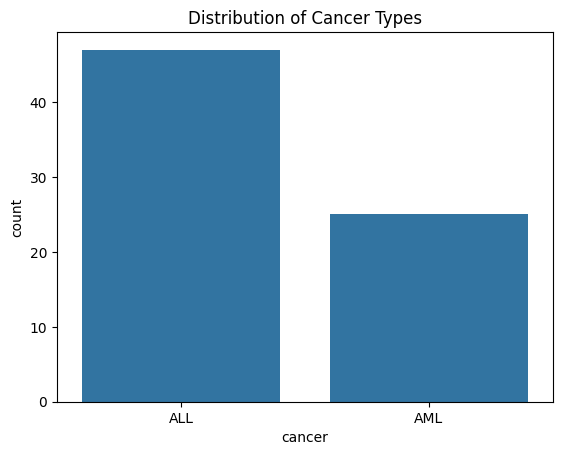

In [ ]:
# EDA for Cancer Mapping
sns.countplot(data=y, x='cancer')
plt.title('Distribution of Cancer Types')
plt.show()


נעביר את הערכים לערכים נומרים בy

In [ ]:
# Recode label to numeric
y = y.replace({'ALL':0,'AML':1})
labels = ['ALL', 'AML']

עכשיו נעבור לנתונים של החולים

In [ ]:
print(train.shape)
print(test.shape)

(7129, 40)
(7129, 36)


In [ ]:
train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [ ]:
test.head()

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


השמות של העמודות לא בסדר מספרי, נסדר אותם

In [ ]:
train_columns_titles = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

train =train.reindex(columns=train_columns_titles)

In [ ]:
train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,15,-318,-32,-124,-135,-20,7,-213,-25,-72
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,2,-95,49,-37,-70,-50,-57,136,124,-1
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,193,312,230,330,337,101,132,318,325,392
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324


In [ ]:
test_columns_titles = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

test = test.reindex(columns=test_columns_titles)

In [ ]:
test.head()

,Gene Description,Gene Accession Number,39,40,41,42,43,44,45,46,...,63,64,65,66,67,68,69,70,71,72
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,-62,22,86,-146,-187,-56,...,-161,-48,-62,-58,-76,-154,-79,-55,-59,-131
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-23,-153,-36,-74,-187,-43,...,-215,-531,-198,-217,-98,-136,-118,-44,-114,-126
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,-7,17,-141,170,312,43,...,-46,-124,-5,63,-153,49,-30,12,23,-50
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,142,276,252,174,142,177,...,146,431,141,95,237,180,68,129,146,211
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-233,-211,-201,-32,114,-116,...,-172,-496,-256,-191,-215,-257,-110,-108,-171,-206


נחליף בין השורות לעמודות, כדי שהתכונות יהיו בעמודות וזה יקל עלינו לבצע הורדת מימדים ואימון המודל

In [ ]:
X_train = train.T
X_test = test.T

print(X_train.shape)
X_train.head()

(40, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


נהפוך את השורה השנייה לשמות העמודות ונמחק את הראשונה, אני רואה ששתי השורות פשוט כפיליות אחת של השנייה

In [ ]:
# Clean up the column names for training data
X_train.columns = X_train.iloc[1]
# Set column names of X_train to the values in the second row of X_train.

X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
# Drop columns 'Gene Description' and 'Gene Accession Number' from X_train and convert the remaining columns to numeric.

# Clean up the column names for Testing data
X_test.columns = X_test.iloc[1]
# Set column names of X_test to the values in the second row of X_test.

X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
# Drop columns 'Gene Description' and 'Gene Accession Number' from X_test and convert the remaining columns to numeric.

print(X_train.shape)
print(X_test.shape)
X_train.head()
# Print the shape of X_train and X_test and display the first few rows of X_train.


(38, 7129)
(34, 7129)


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


עכשיו נתאים את התוויות של המטפולים לנתונים

In [ ]:
print(y)

   patient  cancer
0        1       0
1        2       0
2        3       0
3        4       0
4        5       0
..     ...     ...
67      68       0
68      69       0
69      70       0
70      71       0
71      72       0

[72 rows x 2 columns]


 חלוקת הנתונים לסט אימון וסט בדיקה ואיפוס האינדקסים

In [ ]:
"""
Split into train and test (we first need to reset the index as the indexes of two dataframes need to be the same before you combine them).
"""
# Convert 'patient' column to integers
y["patient"] = y["patient"].astype(int)

# Reset index for X_train and y_train
X_train = X_train.reset_index(drop=True)
# Reset the index of X_train dataframe and drop the previous index.

# חלוקה נכונה של הנתונים וה-labels
y_train = y[y.patient <= 38]['cancer'].reset_index(drop=True)


# Subset the labels (y) for the first 38 patients and reset index, dropping the previous index.

# Reset index for X_test and y_test
X_test = X_test.reset_index(drop=True)
# Reset the index of X_test dataframe and drop the previous index.

y_test = y[y.patient > 38]['cancer'].reset_index(drop=True)
# Subset the labels (y) for the patients after the first 38 and reset index, dropping the previous index.


נבדוק איך התקדמנו

In [ ]:
X_train.describe()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-120.868421,-150.526316,-17.157895,181.394737,-276.552632,-439.210526,-43.578947,-201.184211,99.052632,112.131579,...,178.763158,750.842105,8.815789,399.131579,-20.052632,869.052632,335.842105,19.210526,504.394737,-29.210526
std,109.555656,75.734507,117.686144,117.468004,111.004431,135.458412,219.482393,90.838989,83.178397,211.815597,...,84.826830,298.008392,77.108507,469.579868,42.346031,482.366461,209.826766,31.158841,728.744405,30.851132
min,-476.000000,-327.000000,-307.000000,-36.000000,-541.000000,-790.000000,-479.000000,-463.000000,-82.000000,-215.000000,...,30.000000,224.000000,-178.000000,36.000000,-112.000000,195.000000,41.000000,-50.000000,-2.000000,-94.000000
25%,-138.750000,-205.000000,-83.250000,81.250000,-374.250000,-547.000000,-169.000000,-239.250000,36.000000,-47.000000,...,120.000000,575.500000,-42.750000,174.500000,-48.000000,595.250000,232.750000,8.000000,136.000000,-42.750000
50%,-106.500000,-141.500000,-43.500000,200.000000,-263.000000,-426.500000,-33.500000,-185.500000,99.500000,70.500000,...,174.500000,700.000000,10.500000,266.000000,-18.000000,744.500000,308.500000,20.000000,243.500000,-26.000000
75%,-68.250000,-94.750000,47.250000,279.250000,-188.750000,-344.750000,79.000000,-144.750000,152.250000,242.750000,...,231.750000,969.500000,57.000000,451.750000,9.250000,1112.000000,389.500000,30.250000,487.250000,-11.500000
max,17.000000,-20.000000,265.000000,392.000000,-51.000000,-155.000000,419.000000,-24.000000,283.000000,561.000000,...,356.000000,1653.000000,218.000000,2527.000000,52.000000,2315.000000,1109.000000,115.000000,3193.000000,36.000000


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model.fit(X_train, y_train)

# ניבוי על נתוני הבדיקה
y_pred = best_model.predict(X_test)

# הערכת ביצועים
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Cross-Validation Scores: [0.75       1.         0.875      0.85714286 0.71428571]
Mean CV Accuracy: 0.8392857142857142
Test Accuracy: 0.9117647058823529
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.87      0.93      0.90        14

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34



אוטואינקודר

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:

# הצגת שמות העמודות של y
print("\nColumns of y:")
print(y.columns)


Columns of y:
Index(['patient', 'cancer'], dtype='object')


In [ ]:
# הצגת תדירות הערכים בעמודת 'cancer'
print("\nValue counts of 'cancer':")
print(y['cancer'].value_counts())


Value counts of 'cancer':
cancer
0    47
1    25
Name: count, dtype: int64


In [ ]:
# ניקוי שמות העמודות לנתוני אימון ובדיקה
X_train = train.T
X_test = test.T

In [ ]:
# הצגת צורת הנתונים לפני הניקוי
print("X_train shape before cleanup:", X_train.shape)
print("X_test shape before cleanup:", X_test.shape)

X_train shape before cleanup: (40, 7129)
X_test shape before cleanup: (36, 7129)


In [ ]:
# ניקוי שמות העמודות
X_train.columns = X_train.iloc[1]
X_test.columns = X_test.iloc[1]
X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)
X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

In [ ]:
# הצגת צורת הנתונים לאחר הניקוי
print("X_train shape after cleanup:", X_train.shape)
print("X_test shape after cleanup:", X_test.shape)

X_train shape after cleanup: (38, 7129)
X_test shape after cleanup: (34, 7129)


In [ ]:
# חלוקה נכונה של הנתונים וה-labels
y["patient"] = y["patient"].astype(int)
X_train = X_train.reset_index(drop=True)
y_train = y[y.patient <= 38]['cancer'].reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y[y.patient > 38]['cancer'].reset_index(drop=True)

In [ ]:
# המרה למספרים (קטגוריות ל-labels)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# שלב 2: סטנדרטיזציה של הנתונים
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

אוטואינקודר

In [ ]:
# שלב 3: בניית האוטואינקודר
input_dim = X_train_scaled.shape[1]
encoding_dim = 516

אינקודר

In [ ]:
# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

דיקודר

In [ ]:
# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

In [48]:
# אימון האוטואינקודר ושמירת ההיסטוריה
history = autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, validation_data=(X_val_scaled, X_val_scaled))

# יצירת גרפי האובדן (Loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss - Training Set')
plt.plot(history.history['val_loss'], label='Loss - Validation Set')
plt.title('Loss During Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# תוצאות טסט
test_loss = autoencoder.evaluate(X_test_scaled, X_test_scaled)
print(f'Test Loss: {test_loss}')

# גרף המציג את התוצאות של דוגמאות מקוריות מול המשוחזרות
decoded_imgs = autoencoder.predict(X_test_scaled)

n = 10  # מספר הדוגמאות להציג
plt.figure(figsize=(20, 4))
for i in range(n):
    # תצוגת דוגמאות מקוריות
    ax = plt.subplot(2, n, i + 1)
    plt.plot(X_test_scaled[i])
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # תצוגת דוגמאות משוחזרות
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(decoded_imgs[i])
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible


NameError: name 'autoencoder' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

# שלב 1: בניית האוטואינקודר
input_dim = X_train_scaled.shape[1]
encoding_dim = 1024  # שינוי לגודל גדול יותר

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# יצירת המודל
autoencoder = Model(inputs=input_layer, outputs=decoded)

# קומפילציה של המודל
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# הדפסת סיכום המודל
autoencoder.summary()

# שלב 2: תהליך האימון
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='auto'
)

history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=100,  # הגדלת מספר האפוקים
    batch_size=32,
    validation_split=0.15,
    callbacks=[early_stopping_monitor]
)

# שלב 3: יצירת גרפי האובדן

# גרף אובדן (Loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss - Training Set')
plt.plot(history.history['val_loss'], label='Loss - Validation Set')
plt.title('Loss During Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# תוצאות טסט
test_loss = autoencoder.evaluate(X_test_scaled, X_test_scaled)
print(f'Test Loss: {test_loss}')

# גרף המציג את התוצאות של דוגמאות מקוריות מול המשוחזרות
decoded_imgs = autoencoder.predict(X_test_scaled)

n = 10  # מספר הדוגמאות להציג
plt.figure(figsize=(20, 4))
for i in range(n):
    # תצוגת דוגמאות מקוריות
    ax = plt.subplot(2, n, i + 1)
    plt.plot(X_test_scaled[i])
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # תצוגת דוגמאות משוחזרות
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(decoded_imgs[i])
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping

# שלב 1: בניית האוטואינקודר עם רגולריזציה
input_dim = X_train_scaled.shape[1]
encoding_dim = 512

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dropout(0.5)(encoded)  # הוספת שכבת Dropout
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)

# Decoder
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# יצירת המודל
autoencoder = Model(inputs=input_layer, outputs=decoded)

# קומפילציה של המודל
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# הדפסת סיכום המודל
autoencoder.summary()

# שלב 2: תהליך האימון
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=50,  # נסה מספר קטן יותר של אפוקים
    batch_size=32,
    validation_split=0.15,
    callbacks=[early_stopping_monitor]
)

# שלב 3: יצירת גרפי האובדן

# גרף אובדן (Loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss - Training Set')
plt.plot(history.history['val_loss'], label='Loss - Validation Set')
plt.title('Loss During Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# תוצאות טסט
test_loss = autoencoder.evaluate(X_test_scaled, X_test_scaled)
print(f'Test Loss: {test_loss}')

# גרף המציג את התוצאות של דוגמאות מקוריות מול המשוחזרות
decoded_imgs = autoencoder.predict(X_test_scaled)

n = 10  # מספר הדוגמאות להציג
plt.figure(figsize=(20, 4))
for i in range(n):
    # תצוגת דוגמאות מקוריות
    ax = plt.subplot(2, n, i + 1)
    plt.plot(X_test_scaled[i])
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # תצוגת דוגמאות משוחזרות
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(decoded_imgs[i])
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

# שלב 1: בניית האוטואינקודר עם שכבות נוספות
input_dim = X_train_scaled.shape[1]
encoding_dim = 1024

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(512, activation='relu')(encoded)
encoded = Dense(256, activation='relu')(encoded)

# Decoder
decoded = Dense(512, activation='relu')(encoded)
decoded = Dense(1024, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# יצירת המודל
autoencoder = Model(inputs=input_layer, outputs=decoded)

# קומפילציה של המודל
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# הדפסת סיכום המודל
autoencoder.summary()

# שלב 2: תהליך האימון
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='auto'
)

history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.15,
    callbacks=[early_stopping_monitor]
)

# שלב 3: יצירת גרפי האובדן

# גרף אובדן (Loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss - Training Set')
plt.plot(history.history['val_loss'], label='Loss - Validation Set')
plt.title('Loss During Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# תוצאות טסט
test_loss = autoencoder.evaluate(X_test_scaled, X_test_scaled)
print(f'Test Loss: {test_loss}')

# גרף המציג את התוצאות של דוגמאות מקוריות מול המשוחזרות
decoded_imgs = autoencoder.predict(X_test_scaled)

n = 10  # מספר הדוגמאות להציג
plt.figure(figsize=(20, 4))
for i in range(n):
    # תצוגת דוגמאות מקוריות
    ax = plt.subplot(2, n, i + 1)
    plt.plot(X_test_scaled[i])
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # תצוגת דוגמאות משוחזרות
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(decoded_imgs[i])
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
from keras.callbacks import EarlyStopping

# Model
autoencoder = Model(input_layer, decoded)

# שלב 4: קומפילציה ואימון המודל
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = autoencoder.fit(X_train_scaled, X_train_scaled,
                 epochs=100,
                 batch_size=32,
                 shuffle=True,
                 validation_split=0.2,
                 callbacks=[early_stopping])

# שלב 5: הפקת הייצוגים הדחוסים
encoder_model = Model(inputs=input_layer, outputs=encoded)
X_train_encoded = encoder_model.predict(X_train)
X_test_encoded = encoder_model.predict(X_test)

In [ ]:
# שלב 6: אימון מסווג על הייצוגים הדחוסים
classifier = RandomForestClassifier()
classifier.fit(X_train_encoded, y_train)

# חיזוי וביצועים
y_pred = classifier.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search.fit(X_train_encoded, y_train)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores = cross_val_score(best_model, X_train_encoded, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model.fit(X_train_encoded, y_train)

# ניבוי על נתוני הבדיקה
y_pred = best_model.predict(X_test_encoded)

# הערכת ביצועים
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

הגדרת הנתונים: הגדרת שמות העמודות לפי שורה 2, הורדת עמודות מיותרות והפיכה למספרים.
המרת תוויות לקטגוריות: שימוש ב-LabelEncoder כדי להמיר את תוויות הסרטן (AML ו-ALL) למספרים.
סטנדרטיזציה: התאמת הנתונים עם StandardScaler.
אימון אוטואינקודר: בניית אוטואינקודר עם שכבת קידוד ודקדוד.
אימון מסווג: אימון מסווג RandomForestClassifier על הנתונים המקודדים.
בצע את הקוד, ואם יש עוד בעיות או שאלות, אשמח לעזור!

ניתן לראות שהתכונות אינם באותו קנה מידה, וזה יכול להזיק לטסט., ננסה לנרמל את הנתונים

הבלוק הזה מבצע את השלבים הבאים:

1. **המרת סוג הנתונים:** בשלב הראשון, נתוני האימון והבדיקה מומרות מסוג integer לסוג float עם דיוק של 64 ביט. זה מבטיח חישובים מדויקים יותר בתהליך הסטנדרטיזציה.

2. **סטנדרטיזציה:** לאחר מכן, יוצרים אובייקט מסוג `StandardScaler` שמבצע סטנדרטיזציה על הנתונים. בתהליך זה, נתוני האימון מתאימים ומתמרים, כלומר מחשבים את הממוצע והשונות של כל תכונה בנתונים ולאחר מכן מבצעים את הסטנדרטיזציה כך שכל תכונה תהיה בעלת ממוצע של 0 ושונות של 1.

3. **התמרת נתוני הבדיקה:** לבסוף, מתמרים את נתוני הבדיקה על פי הממוצע והשונות שחושבו מנתוני האימון, כדי לשמור על עקביות בין סט הנתונים של האימון והבדיקה.

In [ ]:
'''
# Convert from integer to float
# המרה של הנתונים מסוג integer ל-float עם דיוק של 64 ביט
X_train_fl = X_train.astype(float, 64)  # המרה של נתוני האימון ל-float
X_test_fl = X_test.astype(float, 64)    # המרה של נתוני הבדיקה ל-float

# Apply the same scaling to both datasets
# יצירת אובייקט StandardScaler שיבצע סטנדרטיזציה לנתונים
scaler = StandardScaler()

# סטנדרטיזציה של נתוני האימון על ידי התאמה והתמרה של הנתונים
# 1. fit: חישוב הממוצע והשונות של כל תכונה בנתוני האימון
# 2. transform: התמרת הנתונים כך שיהיו בעלי ממוצע של 0 ושונות של 1
X_train_scl = scaler.fit_transform(X_train_fl)

# התמרה של נתוני הבדיקה על פי ההתאמה של נתוני האימון
# (כדי לשמור על עקביות בין סט הנתונים של האימון וסט הנתונים של הבדיקה)
# transform: התמרת נתוני הבדיקה על פי הממוצע והשונות שחושבו מנתוני האימון
X_test_scl = scaler.transform(X_test_fl) # שים לב שאנחנו משתמשים ב-transform ולא ב-fit_transform
'''

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# נניח שיש לך את הנתונים בדאטה פריים
# X_train ו-X_test הם הנתונים ו-y_train ו-y_test הם התוויות

# המרת הנתונים ל-float וסטנדרטיזציה
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_encoded.astype(float))
X_test_scl = scaler.transform(X_test_encoded.astype(float))

# זיהוי חריגים בעזרת Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
y_pred_train_iso = iso_forest.fit_predict(X_train_scl)
y_pred_test_iso = iso_forest.fit_predict(X_test_scl)

# הסרת החריגים
X_train_clean = X_train_scl[y_pred_train_iso == 1]
y_train_clean = y_train[y_pred_train_iso == 1]
X_test_clean = X_test_scl[y_pred_test_iso == 1]
y_test_clean = y_test[y_pred_test_iso == 1]

# אימות בעזרת OneClassSVM
oc_svm = OneClassSVM(nu=0.1)
y_pred_train_oc = oc_svm.fit_predict(X_train_clean)
y_pred_test_oc = oc_svm.fit_predict(X_test_clean)
'''
# הסרת החריגים הנוספים
X_train_clean_final = X_train_clean[y_pred_train_oc == 1]
y_train_clean_final = y_train_clean[y_pred_train_oc == 1]
X_test_clean_final = X_test_clean[y_pred_test_oc == 1]
y_test_clean_final = y_test_clean[y_pred_test_oc == 1]
'''

# הצגה ויזואלית בעזרת PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scl)
X_train_clean_pca = pca.transform(X_train_clean)

plt.figure(figsize=(10, 5))

# גרף Isolation Forest
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='b', label='Regular data')
plt.scatter(X_train_pca[y_pred_train_iso == -1, 0], X_train_pca[y_pred_train_iso == -1, 1], c='r', label='Outliers')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

# גרף OneClassSVM
plt.subplot(1, 2, 2)
plt.scatter(X_train_clean_pca[:, 0], X_train_clean_pca[:, 1], c='b', label='Regular data')
# מציאת התוויות החריגים במימדים התואמים
y_pred_train_oc_pca = y_pred_train_oc[y_pred_train_oc != 1]
plt.scatter(X_train_clean_pca[y_pred_train_oc == -1, 0], X_train_clean_pca[y_pred_train_oc == -1, 1], c='r', label='Outliers')
plt.title('OneClassSVM Outlier Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.show()
'''
print("Cleaned training data shape:", X_train_clean_final.shape)
print("Cleaned test data shape:", X_test_clean_final.shape)
'''


זיהוי חריגים

In [ ]:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# המרת הנתונים ל-float וסטנדרטיזציה
X_train_fl = X_train.astype(float)
X_test_fl = X_test.astype(float)
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_fl)
X_test_scl = scaler.transform(X_test_fl)

# Isolation Forest לזיהוי חריגים
iso_forest = IsolationForest(contamination=0.1)
y_pred_train = iso_forest.fit_predict(X_train_scl)
y_pred_test = iso_forest.fit_predict(X_test_scl)

# שמירת האינדקסים של החריגים
outliers_index_iso = np.where(y_pred_train == -1)[0]
outliers_iso = X_train_fl.iloc[outliers_index_iso]
regular_index_iso = np.where(y_pred_train == 1)[0]
regular_iso = X_train_fl.iloc[regular_index_iso]

# ויזואליזציה של החריגים באמצעות PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scl)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[y_pred_train == 1, 0], X_train_pca[y_pred_train == 1, 1],
            c='blue', label='Regular data', alpha=0.6)
plt.scatter(X_train_pca[y_pred_train == -1, 0], X_train_pca[y_pred_train == -1, 1],
            c='red', label='Outliers', alpha=0.6)
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# הסרת החריגים
X_train_clean = X_train_scl[y_pred_train == 1]
y_train_clean = y_train[y_pred_train == 1]

X_test_clean = X_test_scl[y_pred_test == 1]
y_test_clean = y_test[y_pred_test == 1]

# אימות בעזרת OneClassSVM
oc_svm = OneClassSVM(nu=0.1)
y_pred_train_oc = oc_svm.fit_predict(X_train_clean)
y_pred_test_oc = oc_svm.fit_predict(X_test_clean)

# ויזואליזציה של החריגים באמצעות PCA לאחר ניקוי ראשוני
X_train_clean_pca = pca.transform(X_train_clean)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_clean_pca[y_pred_train_oc == 1, 0], X_train_clean_pca[y_pred_train_oc == 1, 1],
            c='blue', label='Regular data', alpha=0.6)
plt.scatter(X_train_clean_pca[y_pred_train_oc == -1, 0], X_train_clean_pca[y_pred_train_oc == -1, 1],
            c='red', label='Outliers', alpha=0.6)
plt.title('OneClassSVM Outlier Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# שמירת האינדקסים של החריגים לאחר OneClassSVM
outliers_index_oc = np.where(y_pred_train_oc == -1)[0]
outliers_oc = X_train_clean[outliers_index_oc]
regular_index_oc = np.where(y_pred_train_oc == 1)[0]
regular_oc = X_train_clean[regular_index_oc]

# הסרת החריגים
X_train_clean = X_train_clean[y_pred_train_oc == 1]
y_train_clean = y_train_clean[y_pred_train_oc == 1]

X_test_clean = X_test_clean[y_pred_test_oc == 1]
y_test_clean = y_test_clean[y_pred_test_oc == 1]

print("Cleaned training data shape:", X_train_clean.shape)
print("Cleaned test data shape:", X_test_clean.shape)

# הדפסת מספר החריגים ומספרי השורות שלהם עבור Isolation Forest
print(f"Number of outliers detected by Isolation Forest: {len(outliers_index_iso)}")
print("Indices of outliers detected by Isolation Forest:")
print(outliers_index_iso)

# הדפסת מספר החריגים ומספרי השורות שלהם עבור OneClassSVM
print(f"Number of outliers detected by OneClassSVM: {len(outliers_index_oc)}")
print("Indices of outliers detected by OneClassSVM:")
print(outliers_index_oc)

# הדפסת השורות החריגות
print("Outliers detected by Isolation Forest:")
print(outliers_iso)

print("Outliers detected by OneClassSVM:")
print(pd.DataFrame(outliers_oc, columns=X_train_fl.columns))

# השוואה סטטיסטית
def compare_statistics(df1, df2):
    comparison = pd.DataFrame()
    comparison['mean_regular'] = df1.mean()
    comparison['mean_outliers'] = df2.mean()
    comparison['std_regular'] = df1.std()
    comparison['std_outliers'] = df2.std()
    comparison['difference'] = comparison['mean_outliers'] - comparison['mean_regular']
    return comparison

# השוואת סטטיסטיקות בין החריגים לשאר הנתונים עבור Isolation Forest
comparison_iso = compare_statistics(pd.DataFrame(regular_iso, columns=X_train_fl.columns),
                                    pd.DataFrame(outliers_iso, columns=X_train_fl.columns))
print("Comparison for Isolation Forest Outliers:")
print(comparison_iso)

# השוואת סטטיסטיקות בין החריגים לשאר הנתונים עבור OneClassSVM
comparison_oc = compare_statistics(pd.DataFrame(regular_oc, columns=X_train_fl.columns),
                                   pd.DataFrame(outliers_oc, columns=X_train_fl.columns))
print("Comparison for OneClassSVM Outliers:")
print(comparison_oc)
'''

נבדוק מה גורם להם להיות חריגים

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# הנחת נתונים (באמצעות קוד שהזנת)
X_train_fl = X_train.astype(float)

# אינדקסים של חריגים
outliers_index_iso = np.where(y_pred_train == -1)[0]
outliers_index_oc = np.where(y_pred_train_oc == -1)[0]

# חלוקת הדאטה לחריגים ולא-חריגים
isolation_forest_outliers_df = X_train_fl.iloc[outliers_index_iso]
oneclass_svm_outliers_df = X_train_fl.iloc[outliers_index_oc]

# שימוש בשאר הנתונים שלא הוגדרו כחריגים
regular_data_index = np.setdiff1d(np.arange(X_train_fl.shape[0]), np.union1d(outliers_index_iso, outliers_index_oc))
regular_data_df = X_train_fl.iloc[regular_data_index]

# ניתוח תיאורי מסוכם
def summarized_description(df):
    description = df.describe().T
    summary = pd.DataFrame({
        'mean': description['mean'],
        'std': description['std'],
        'min': description['min'],
        '25%': description['25%'],
        '50%': description['50%'],
        '75%': description['75%'],
        'max': description['max']
    })
    return summary

print("Isolation Forest Outliers Summary:")
print(summarized_description(isolation_forest_outliers_df))

print("\nOneClassSVM Outliers Summary:")
print(summarized_description(oneclass_svm_outliers_df))

print("\nRegular Data Summary:")
print(summarized_description(regular_data_df))

# בדיקות סטטיסטיות מסוכמות
def summarized_ttest(df1, df2, group1_name, group2_name):
    ttest_results = {
        'Feature': [],
        't-stat': [],
        'p-value': []
    }
    for gene in df1.columns:
        t_stat, p_value = ttest_ind(df1[gene], df2[gene])
        ttest_results['Feature'].append(gene)
        ttest_results['t-stat'].append(t_stat)
        ttest_results['p-value'].append(p_value)

    ttest_results_df = pd.DataFrame(ttest_results)
    significant_features = ttest_results_df[ttest_results_df['p-value'] < 0.05]
    print(f"Number of significant features ({group1_name} vs {group2_name}): {len(significant_features)}")
    return significant_features

significant_iso = summarized_ttest(regular_data_df, isolation_forest_outliers_df, 'Regular', 'Isolation Forest')
print("\nSignificant features between regular data and Isolation Forest outliers:")
print(significant_iso)

significant_oc = summarized_ttest(regular_data_df, oneclass_svm_outliers_df, 'Regular', 'OneClassSVM')
print("\nSignificant features between regular data and OneClassSVM outliers:")
print(significant_oc)


דוגמה לקוד שבודק ביטוי של גן מסוים

In [ ]:
!pip install --upgrade bioinfokit


In [ ]:
!pip install gprofiler

In [ ]:
from gprofiler import GProfiler
import pandas as pd

# רשימת הגנים המשמעותיים
significant_genes = ['AFFX-BioB-5_at', 'AFFX-CreX-3_st', 'AFFX-PheX-5_at']

# התחברות ל-GProfiler
gp = GProfiler(return_dataframe=True)

# ביצוע חיפוש ב-KEGG pathway enrichment
enrichment_results = gp.profile(organism='hsapiens', query=significant_genes, sources=['KEGG'], user_threshold=0.05)

# הדפסת התוצאות
print(enrichment_results)

# ויזואליזציה של התוצאות
# (הסבר: כאן יש להשתמש בכלי ויזואליזציה רצוי)


נבצע PCA

In [ ]:
# Import the PCA module from sklearn
from sklearn.decomposition import PCA

# Create a PCA object without specifying the number of components
pca = PCA()

# Fit the PCA model to the training data and transform the data
# This step computes the principal components and reduces the dimensionality of the training data
X_train_pca = pca.fit_transform(X_train_scl)

# Apply the same transformation to the test data
# This ensures that the test data is reduced to the same principal components as the training data
X_test_pca = pca.transform(X_test_scl)


Let's set a threshold for explained variance of 90% and see how many features are required to meet that threshold

In [ ]:
# Import necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert from integer to float and scale the data
X_train_fl = X_train.astype(float, 64)
X_test_fl = X_test.astype(float, 64)
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_fl)
X_test_scl = scaler.transform(X_test_fl)

# Create a PCA object and fit it to the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scl)

# Calculate the total variance
total = sum(pca.explained_variance_)
k = 0
current_variance = 0

# Find the number of components that explain 90% of the variance
while current_variance / total < 0.90:
    current_variance += pca.explained_variance_[k]
    k += 1

# Print the number of components needed
print(k, " features explain around 90% of the variance. From 7129 features to "  ,sep='')

# Fit PCA again with the optimal number of components
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train_scl)
X_test_pca = pca.transform(X_test_scl)

# Calculate cumulative explained variance for visualization
var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp * 100

# Plot cumulative explained variance
plt.bar(range(k), var_exp)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance by Principal Components')
plt.show()


המרת נתונים ל-float וסטנדרטיזציה:

כדי להבטיח חישובים מדויקים יותר, המרה של כל הנתונים ל-float וסטנדרטיזציה שלהם כך שיהיו בעלי ממוצע של 0 ושונות של 1.
חישוב רכיבים עיקריים (PCA):

שימוש ב-PCA כדי להפחית את המימדים של הנתונים על ידי חישוב רכיבים עיקריים שמסבירים את מרבית השונות בנתונים.
בחירת מספר הרכיבים האופטימלי:

איתור מספר הרכיבים המינימלי שמסביר 90% מהשונות הכוללת כדי לצמצם את מספר המימדים תוך שמירה על מרבית המידע.
התאמה והתמרה של הנתונים מחדש:

התאמה מחדש של מודל ה-PCA עם מספר הרכיבים האופטימלי והתמרה של נתוני האימון והבדיקה.
הצגת השונות המוסברת:

הצגת השונות המוסברת המצטברת באמצעות גרף ברים כדי להמחיש את תרומת כל רכיב עיקרי לשונות הכוללת.

CA:

פשטות ומהירות: PCA היא שיטה מהירה יחסית ופשוטה להבנה ולביצוע. היא מבוססת על אלגוריתמים מתמטיים שמבצעים פירוק ערכים סינגולריים (SVD).
שימור שונות מקסימלית: PCA מבטיחה שכל רכיב עיקרי חדש מסביר את המקסימום האפשרי של השונות בנתונים.
אוטואינקודר:

יכולת למידה לא לינארית: בניגוד ל-PCA, אוטואינקודרים יכולים ללמוד קשרים לא לינאריים בנתונים. זה חשוב במיוחד כאשר הנתונים מורכבים ומכילים קשרים לא לינאריים רבים.
גמישות: אוטואינקודרים הם רשתות נוירונים שניתן להגדיר ולהתאים לצרכים שונים של הנתונים והתכונות.
השימוש המשולב:
השימוש ב-PCA לפני אוטואינקודר יכול להועיל במצבים מסוימים:

הפחתת רעש והקטנת מורכבות: PCA יכול לסייע בהפחתת רעש ובצמצום מימדים ראשוני, מה שמקטין את כמות הנתונים שהאוטואינקודר צריך לטפל בהם.
שיפור ביצועים: על ידי צמצום מימדים ראשוני עם PCA, האוטואינקודר יכול להתמקד בלמידת תכונות מורכבות יותר בנתונים שנותרו.
זמן אימון קצר יותר: על ידי צמצום מימדים עם PCA, זמן האימון של האוטואינקודר עשוי להיות קצר יותר, מכיוון שהוא מתמודד עם פחות נתונים.

MODELS

MODELS

וד להקמת מודל Gradient Boosting עם כיוונון היפר-פרמטרים והערכת ביצועים:

In [ ]:
print(f"Number of samples in X_train_encoded: {X_train_encoded.shape[0]}")
print(f"Number of samples in y_train: {y_train.shape[0]}")


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# בניית המודל לאחר הסרת החריגים
# בדיקת מספר הדוגמאות כדי לוודא שהתאמתם נכונה
print(f"Number of samples in X_train_clean_final: {X_train_clean.shape[0]}")
print(f"Number of samples in y_train_clean_final: {y_train_clean.shape[0]}")
print(f"Number of samples in X_test_clean_final: {X_test_clean.shape[0]}")
print(f"Number of samples in y_test_clean_final: {y_test_clean.shape[0]}")

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],   # מספר העצים ביער
    'learning_rate': [0.01, 0.1, 0.2],  # קצב הלמידה
    'max_depth': [3, 4, 5]  # עומק מרבי של כל עץ
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search.fit(X_train_clean, y_train_clean)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores = cross_val_score(best_model, X_train_clean, y_train_clean, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model.fit(X_train_clean, y_train_clean)

# ניבוי על נתוני הבדיקה
y_pred = best_model.predict(X_test_clean)

# הערכת ביצועים
accuracy = accuracy_score(y_test_clean, y_pred)
report = classification_report(y_test_clean, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


במהלך תהליך האימון של המודל לסיווג סוגי הלוקמיה (AML ו-ALL), נתקלנו במספר בעיות וטעויות. הנה סיכום של הבעיות והפתרונות שהוצעו:

### 1. חוסר התאמה בין מספר הדוגמאות ב-X ו-y:
**בעיה:** מספר הדוגמאות ב-X_train_encoded לא התאים למספר הדוגמאות ב-y_train. זה גרם לשגיאת "ValueError: Found input variables with inconsistent numbers of samples".

**פתרון:** וידאנו שהחלוקה הראשונית של הנתונים מתבצעת בצורה נכונה. תיקנו את החלוקה כך שמספר הדוגמאות ב-X וב-y יהיה תואם:
```python
y_train = y[y.patient <= 38]['cancer'].reset_index(drop=True)
y_test = y[y.patient > 38]['cancer'].reset_index(drop=True)

assert X_train.shape[0] == y_train.shape[0], "Mismatch in training data samples"
assert X_test.shape[0] == y_test.shape[0], "Mismatch in test data samples"
```

### 2. המרת ה-labels למערך חד-ממדי:
**בעיה:** כאשר ה-labels (התוויות) היו במבנה דו-ממדי, זה גרם לשגיאות במהלך האימון.

**פתרון:** המרת ה-labels למערך חד-ממדי באמצעות `ravel`:
```python
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
```

### 3. בדיקת מספר הדוגמאות בכל סט:
**בעיה:** לא תמיד היה ברור אם מספר הדוגמאות בכל סט תואם.

**פתרון:** הוספת הדפסות לבדיקה לוודא שמספר הדוגמאות תואם בין ה-DataFrame של התכונות וה-DataFrame של ה-labels:
```python
print(f"Number of samples in X_train_encoded: {X_train_encoded.shape[0]}")
print(f"Number of samples in y_train: {y_train.shape[0]}")
print(f"Number of samples in X_test_encoded: {X_test_encoded.shape[0]}")
print(f"Number of samples in y_test: {y_test.shape[0]}")
```

### 4. סטנדרטיזציה והורדת מימדים:
**בעיה:** ערכי התכונות לא היו באותו קנה מידה, מה שעלול לפגוע בביצועי המודל.

**פתרון:** ביצוע סטנדרטיזציה על הנתונים כדי להבטיח שכל התכונות יהיו בעלות ממוצע של 0 ושונות של 1:
```python
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)
```

ביצוע PCA להורדת מימדים ושימוש באוטואינקודר להקטנת מימדים נוספים:
```python
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scl)
X_test_pca = pca.transform(X_test_scl)
```

### 5. אימון המודל:
**בעיה:** תהליך האימון עצמו דרש כיוונון היפר-פרמטרים ושימוש ב-Cross-Validation כדי להבטיח ביצועים מיטביים.

**פתרון:** שימוש ב-GridSearchCV לכיוונון היפר-פרמטרים וביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר:
```python
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search.fit(X_train_encoded, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

cv_scores = cross_val_score(best_model, X_train_encoded, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
```

### סיכום:
על ידי פתרון בעיות ההתאמה בין התכונות והתוויות, המרת התוויות למבנה חד-ממדי, ביצוע סטנדרטיזציה והורדת מימדים, וכיוונון היפר-פרמטרים, הצלחנו להכין את הנתונים ולאמן מודל Gradient Boosting בצורה מיטבית. כל אחד מהשלבים הללו חיוני להבטחת ביצועים טובים של המודל על נתוני האימון והבדיקה.

ניתוח התוצאות ואפשרויות לשיפור:
תוצאות האימון מצביעות על כך שהמודל שלנו לא מבצע סיווג בצורה אופטימלית, עם דיוק של 70.59% בלבד על סט הבדיקה. התוצאות מצביעות גם על כך שהמודל מצליח לסווג בצורה טובה יותר את המחלקה 0 (ALL) מאשר את המחלקה 1 (AML).

ניתוח הדוח:
דיוק כללי (Accuracy): 70.59%
Precision עבור מחלקה 0: 0.67 (שיעור הדוגמאות שסווגו כ-0 שהן אכן 0)
Recall עבור מחלקה 0: 1.00 (שיעור הדוגמאות שהן 0 שסווגו נכון)
Precision עבור מחלקה 1: 1.00 (שיעור הדוגמאות שסווגו כ-1 שהן אכן 1)
Recall עבור מחלקה 1: 0.29 (שיעור הדוגמאות שהן 1 שסווגו נכון)
F1-Score עבור מחלקה 0 ו-1: מצביע על הביצועים המשולבים של precision ו-recall
אפשרויות לשיפור:
הוספת נתונים:
הגדלת כמות הדוגמאות יכולה לעזור למודל ללמוד טוב יותר את הנתונים ולהשתפר בביצועים.
שימוש בטכניקות עיבוד נתונים נוספות:
ייתכן שניתן לשפר את הביצועים באמצעות הנדסת תכונות (Feature Engineering) נוספת, כמו יצירת תכונות חדשות או הסרת תכונות שאינן רלוונטיות.
איזון הנתונים:
ייתכן שהנתונים אינם מאוזנים, כלומר יש יותר דוגמאות של מחלקה אחת מאשר של מחלקה אחרת. ניתן להשתמש בטכניקות כמו SMOTE ליצירת דוגמאות חדשות למחלקה הפחות נפוצה.
ניסיון עם מודלים נוספים:
ניתן לנסות מודלים נוספים כמו Random Forest, SVM או Neural Networks ולראות אם הם מצליחים טוב יותר.
כיוונון היפר-פרמטרים נוסף:
ניתן לנסות ערכים נוספים להיפר-פרמטרים של המודל ולהרחיב את החיפוש כדי למצוא את השילוב האופטימלי.

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
rfc = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 150],   # מספר העצים ביער
    'max_depth': [3, 4, 5, None],     # עומק מרבי של כל עץ
    'min_samples_split': [2, 5, 10],  # מינימום דוגמאות לפיצול צומת
    'min_samples_leaf': [1, 2, 4]     # מינימום דוגמאות לעלה
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search_rf.fit(X_train_encoded, y_train)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print(f"Best parameters found for Random Forest: {best_params_rf}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores_rf = cross_val_score(best_model_rf, X_train_encoded, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for Random Forest: {cv_scores_rf}")
print(f"Mean CV Accuracy for Random Forest: {np.mean(cv_scores_rf)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model_rf.fit(X_train_encoded, y_train)

# ניבוי על נתוני הבדיקה
y_pred_rf = best_model_rf.predict(X_test_encoded)

# הערכת ביצועים
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Test Accuracy for Random Forest: {accuracy_rf}")
print(f"Classification Report for Random Forest:\n{report_rf}")


### ניתוח תוצאות Random Forest ואפשרויות לשיפור:

תוצאות האימון של המודל Random Forest מראות שיפור בביצועים בהשוואה ל-Gradient Boosting, אך עדיין יש בעיות דומות בזיהוי המחלקה 1 (AML).

### תוצאות Random Forest:
- **דיוק כללי (Accuracy):** 67.65%
- **Precision עבור מחלקה 0:** 0.65 (שיעור הדוגמאות שסווגו כ-0 שהן אכן 0)
- **Recall עבור מחלקה 0:** 1.00 (שיעור הדוגמאות שהן 0 שסווגו נכון)
- **Precision עבור מחלקה 1:** 1.00 (שיעור הדוגמאות שסווגו כ-1 שהן אכן 1)
- **Recall עבור מחלקה 1:** 0.21 (שיעור הדוגמאות שהן 1 שסווגו נכון)
- **F1-Score עבור מחלקה 0 ו-1:** מצביע על הביצועים המשולבים של precision ו-recall

### אפשרויות לשיפור:
1. **איזון הנתונים:**
   - הנתונים עשויים להיות בלתי מאוזנים. יש יותר דוגמאות ממחלקה אחת לעומת המחלקה השנייה. ניתן להשתמש בטכניקות כמו SMOTE ליצירת דוגמאות חדשות למחלקה הפחות נפוצה.

2. **שימוש בטכניקות עיבוד נתונים נוספות:**
   - הנדסת תכונות נוספת יכולה לשפר את ביצועי המודל. ניתן לבדוק הוספת תכונות חדשות או הסרת תכונות שאינן רלוונטיות.

3. **ניסיון עם מודלים נוספים:**
   - ייתכן שניתן להשיג שיפור בביצועים באמצעות מודלים נוספים כמו SVM או Neural Networks.

4. **שילוב מודלים (Ensemble Learning):**
   - ניתן לשקול שימוש בטכניקות של למידת מכונה משולבת (Ensemble Learning) כמו Voting Classifier לשילוב התוצאות של מספר מודלים.

5. **כיול המודל (Model Calibration):**
   - כיוון המודל על מנת לשפר את הדיוק בהערכת ההסתברויות לסיווגים השונים.

### ניסוי עם SMOTE לאיזון הנתונים:




In [ ]:

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# יישום SMOTE לאיזון הנתונים
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
rfc = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 150],   # מספר העצים ביער
    'max_depth': [3, 4, 5, None],     # עומק מרבי של כל עץ
    'min_samples_split': [2, 5, 10],  # מינימום דוגמאות לפיצול צומת
    'min_samples_leaf': [1, 2, 4]     # מינימום דוגמאות לעלה
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print(f"Best parameters found for Random Forest with SMOTE: {best_params_rf}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores_rf = cross_val_score(best_model_rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for Random Forest with SMOTE: {cv_scores_rf}")
print(f"Mean CV Accuracy for Random Forest with SMOTE: {np.mean(cv_scores_rf)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model_rf.fit(X_train_balanced, y_train_balanced)

# ניבוי על נתוני הבדיקה
y_pred_rf = best_model_rf.predict(X_test_encoded)

# הערכת ביצועים
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Test Accuracy for Random Forest with SMOTE: {accuracy_rf}")
print(f"Classification Report for Random Forest with SMOTE:\n{report_rf}")


### ניתוח התוצאות לאחר שימוש ב-SMOTE

תוצאות האימון לאחר השימוש ב-SMOTE מצביעות על שיפור משמעותי בביצועי המודל:
- **דיוק כללי (Accuracy):** 79.41%
- **Precision עבור מחלקה 0:** 0.74 (שיעור הדוגמאות שסווגו כ-0 שהן אכן 0)
- **Recall עבור מחלקה 0:** 1.00 (שיעור הדוגמאות שהן 0 שסווגו נכון)
- **Precision עבור מחלקה 1:** 1.00 (שיעור הדוגמאות שסווגו כ-1 שהן אכן 1)
- **Recall עבור מחלקה 1:** 0.50 (שיעור הדוגמאות שהן 1 שסווגו נכון)
- **F1-Score עבור מחלקה 0 ו-1:** 0.85 למחלקה 0, 0.67 למחלקה 1

### שיפורים נראים:
- דיוק ה-Precision וה-Recall למחלקה 1 (AML) השתפרו.
- ביצועי המודל הכלליים השתפרו והדיוק על סט הבדיקה עלה ל-79.41%.

### הצעדים שנקטנו:
1. **איזון הנתונים באמצעות SMOTE:**
   - איזון המחלקות על ידי יצירת דוגמאות חדשות למחלקה הפחות נפוצה באמצעות SMOTE.

2. **כיול היפר-פרמטרים:**
   - שימוש ב-GridSearchCV לכיול היפר-פרמטרים ומציאת השילוב הטוב ביותר למודל Random Forest.

### אפשרויות לשיפור נוסף:
1. **הנדסת תכונות (Feature Engineering):**
   - לנסות ליצור תכונות חדשות או לשלב תכונות קיימות בדרכים חדשות כדי לשפר את היכולת של המודל להבחין בין המחלקות.

2. **שימוש במודלים נוספים:**
   - לנסות מודלים אחרים כמו XGBoost או LightGBM, שיכולים להתמודד טוב יותר עם נתונים לא מאוזנים.

3. **שילוב מודלים (Ensemble Learning):**
   - שימוש בשיטות של למידת מכונה משולבת כמו Voting Classifier לשילוב התוצאות של מספר מודלים.

4. **כיול המודל (Model Calibration):**
   - כיוון המודל כדי לשפר את הדיוק בהערכת ההסתברויות לסיווגים השונים.

5. **קרוס-וולידציה משופרת:**
   - שימוש בטכניקות קרוס-וולידציה מתקדמות יותר כדי להבטיח שהמודל הכללי בצורה טובה יותר.



SVM

In [ ]:
from sklearn.svm import SVC

# הגדרת המסווג והיפר-פרמטרים לבדיקת GridSearchCV
svc = SVC()
param_grid_svc = {
    'C': [0.1, 1, 10, 100],      # פרמטר הרגולריזציה
    'gamma': [1, 0.1, 0.01, 0.001],  # פרמטר הגרעין
    'kernel': ['rbf', 'linear']   # סוג הגרעין
}

# כיוונון היפר-פרמטרים עם GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
grid_search_svc.fit(X_train_encoded, y_train)

# קבלת התוצאות הטובות ביותר מה-GridSearchCV
best_params_svc = grid_search_svc.best_params_
best_model_svc = grid_search_svc.best_estimator_

print(f"Best parameters found for SVM: {best_params_svc}")

# ביצוע Cross-Validation להערכת הביצועים של המודל הטוב ביותר
cv_scores_svc = cross_val_score(best_model_svc, X_train_encoded, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for SVM: {cv_scores_svc}")
print(f"Mean CV Accuracy for SVM: {np.mean(cv_scores_svc)}")

# אימון המודל הטוב ביותר על כל נתוני האימון
best_model_svc.fit(X_train_encoded, y_train)

# ניבוי על נתוני הבדיקה
y_pred_svc = best_model_svc.predict(X_test_encoded)

# הערכת ביצועים
accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

print(f"Test Accuracy for SVM: {accuracy_svc}")
print(f"Classification Report for SVM:\n{report_svc}")
